# 8. 나이대별 고객수, 이탈율 확인

In [1]:
import pandas as pd
df = pd.read_csv("Data/18_Customer_data.csv", encoding="cp949")

In [1]:
import pandas as pd
df = pd.read_excel("Data/customer.cleand (2).xlsx")
df

,고객ID,성별,연령,결혼여부,부양자유무,부양자수,추천횟수,영수증발급여부,과금방식,보안서비스,...,고객이탈여부,이탈가능점수,이탈유형,이탈사유,LTV,만족도,데이터사용료,로밍사용료,총로밍요금,과금액
0,C-14721,여성,43,Yes,No,0,1,Yes,신용카드,Yes,...,No,41,NaN,NaN,4743,3,0,28140,2025070,11675100
1,C-15361,여성,33,Yes,Yes,3,1,Yes,계좌이체,Yes,...,No,49,NaN,NaN,5475,4,0,46440,3347170,11641300
2,C-11025,남성,75,Yes,No,0,5,Yes,계좌이체,Yes,...,No,64,NaN,NaN,4404,3,135600,24180,1738620,11628400
3,C-12687,여성,28,Yes,Yes,1,10,Yes,계좌이체,Yes,...,No,54,NaN,NaN,6173,3,0,53110,3825500,11623300
4,C-16549,여성,26,Yes,No,0,4,Yes,계좌이체,Yes,...,No,44,NaN,NaN,4697,3,0,27460,1978630,11603300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6538,C-11173,남성,42,No,No,0,0,Yes,신용카드,No,...,Yes,78,Dissatisfaction,Poor expertise of phone s,5687,2,0,55370,55370,43900
6539,C-13915,남성,35,No,Yes,2,0,No,신용카드,No,...,Yes,80,Attitude,Attitude of service provi,5437,3,0,14460,14460,43600
6540,C-15667,남성,52,No,No,0,0,Yes,신용카드,No,...,Yes,95,Competitor,Product dissatisfaction,3448,1,0,16050,16050,43100
6541,C-14085,남성,52,No,No,0,0,No,이체/메일확인,No,...,Yes,66,Dissatisfaction,Service dissatisfaction,4152,2,0,3500,3500,42700


In [2]:
import warnings
warnings.filterwarnings('ignore')

df["연령대"] = "0"

for i in range(0, len(df)):
    df["연령대"][i] = f"{int(list(str(df["연령"][i]))[0])}0대"

In [3]:
# 각 연령대별 고객 수 계산
customer_count = df.groupby("연령대")["고객ID"].count()

# 각 연령대별 이탈률 계산
churn_rate = df.groupby("연령대")["고객이탈여부"].apply(lambda x: (x == "Yes").mean())

# 결과 합치기
result = pd.DataFrame({"고객 수": customer_count, "이탈률": churn_rate})

# 이탈률을 백분율(%)로 변환
result["이탈률"] = result["이탈률"] * 100

# 결과 출력
print(result)

     고객 수        이탈률
연령대                 
20대  1277  19.655442
30대  1190  23.025210
40대  1232  21.428571
50대  1167  22.450728
60대   940  28.936170
70대   674  39.465875
80대    63  41.269841


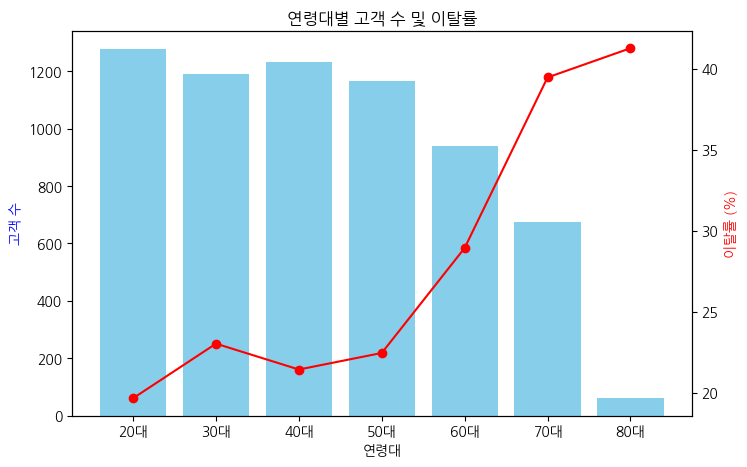

In [5]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(8, 5))

# 막대 그래프 (고객 수)
ax1.bar(result.index, result["고객 수"], color="skyblue", label="고객 수")
ax1.set_ylabel("고객 수", color="blue")

# 선 그래프 (이탈률)
ax2 = ax1.twinx()
ax2.plot(result.index, result["이탈률"], color="red", marker="o", label="이탈률")
ax2.set_ylabel("이탈률 (%)", color="red")

# 제목 & 라벨 추가
plt.title("연령대별 고객 수 및 이탈률")
ax1.set_xlabel("연령대")

# 그래프 출력
plt.show()

-----

In [6]:
# 60대의 이탈 유형 확인 

df[df["연령대"] == "60대"]["이탈유형"].dropna().value_counts().reset_index()

,이탈유형,count
0,Competitor,125
1,Attitude,48
2,Price,39
3,Dissatisfaction,36
4,Other,24


In [7]:
# 60대의 이탈 사유 확인 

df[df["연령대"] == "60대"]["이탈사유"].dropna().value_counts().reset_index()

,이탈사유,count
0,Competitor offered higher,31
1,Attitude of support perso,25
2,Price too high,22
3,Attitude of service provi,21
4,Competitor made better of,21
5,Service dissatisfaction,17
6,Competitor had better dev,17
7,Competitor offered more d,14
8,Long distance charges,14
9,Don't know,14


In [8]:
# 70대의 이탈 유형 확인 

df[df["연령대"] == "70대"]["이탈유형"].dropna().value_counts().reset_index()

,이탈유형,count
0,Competitor,115
1,Attitude,51
2,Dissatisfaction,44
3,Price,30
4,Other,26


In [9]:
# 70대의 이탈 사유 확인 

df[df["연령대"] == "70대"]["이탈사유"].dropna().value_counts().reset_index()

,이탈사유,count
0,Competitor offered more d,27
1,Competitor offered higher,26
2,Competitor made better of,26
3,Attitude of support perso,21
4,Attitude of service provi,20
5,Don't know,20
6,Competitor had better dev,18
7,Network reliability,18
8,Price too high,16
9,Product dissatisfaction,13


In [10]:
# 80대의 이탈 유형 확인 

df[df["연령대"] == "80대"]["이탈유형"].dropna().value_counts().reset_index()

,이탈유형,count
0,Competitor,12
1,Dissatisfaction,6
2,Price,3
3,Attitude,3
4,Other,2


In [11]:
# 80대의 이탈 사유 확인 

df[df["연령대"] == "80대"]["이탈사유"].dropna().value_counts().reset_index()

,이탈사유,count
0,Competitor offered more d,3
1,Attitude of service provi,3
2,Competitor offered higher,2
3,Service dissatisfaction,2
4,Lack of self-service on W,2
5,Product dissatisfaction,2
6,Competitor made better of,2
7,Don't know,2
8,Poor expertise of phone s,1
9,Limited range of services,1


* 해석


📌 주요 고객층은 20~50대

-고객 수가 많고, 이탈률이 비교적 낮음 → 서비스 유지 전략의 핵심 타겟.

-충성 고객을 늘리기 위한 혜택 제공, 맞춤형 프로모션이 필요.


📌 60대 이후 이탈률 급상승

-디지털 서비스 적응 어려움, 비용 부담 등의 요인이 작용 가능.

-해결책: 고령층 맞춤 지원 서비스 제공 (고객 교육, 할인제도, 간편 UI 개선 등)


📌 70대 이상 고객은 자연 감소

-70대 이상 고객은 대체로 서비스 유지 가능성이 낮음.

-새로운 유입보다 젊은 층을 확보하는 것이 중요.

- 결론 & 전략

  
📌 주요 고객층(20~50대)의 충성도를 높이는 전략이 필요

-장기 고객을 위한 멤버십 혜택 강화

-데이터 요금제 최적화

-추천 제도 활용 (기존 고객이 신규 고객을 데려오면 보상)


📌 60대 이상 이탈 방지를 위한 맞춤 전략

-어르신 전용 요금제 및 프로모션 제공

-고객센터 상담 및 교육 프로그램 강화

-사용 편의성 개선 (앱 UI 단순화, 가족 결합 서비스 등)


📌 70대 이상 고객 유지는 어렵지만, 가족 단위 서비스로 접근 가능

-70대 이상 고객을 자녀, 손자들과 연결하는 서비스 제공

-가족 결합 할인 등 가족 단위 프로모션 강화

In [12]:
import pandas as pd

# 연령대별 고객 수와 이탈률 데이터 사용
df_corr = result.copy()

# 상관계수 계산
correlation = df_corr.corr()

# 결과 출력
print(correlation)


          고객 수       이탈률
고객 수  1.000000 -0.935114
이탈률  -0.935114  1.000000


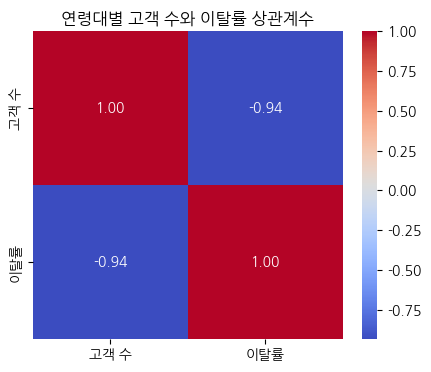

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵 그리기
plt.figure(figsize=(5, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("연령대별 고객 수와 이탈률 상관계수")
plt.show()


In [14]:
import pandas as pd
import scipy.stats as stats

# 연령대별 고객 수와 이탈률 데이터 사용
df_corr = result.copy()

# 피어슨 상관계수 계산
pearson_corr, pearson_p = stats.pearsonr(df_corr["고객 수"], df_corr["이탈률"])

# 스피어만 상관계수 계산
spearman_corr, spearman_p = stats.spearmanr(df_corr["고객 수"], df_corr["이탈률"])

# 결과 출력
print(f"📌 피어슨 상관계수: {pearson_corr:.4f} (p-value: {pearson_p:.4f})")
print(f"📌 스피어만 상관계수: {spearman_corr:.4f} (p-value: {spearman_p:.4f})")


📌 피어슨 상관계수: -0.9351 (p-value: 0.0020)
📌 스피어만 상관계수: -0.9643 (p-value: 0.0005)


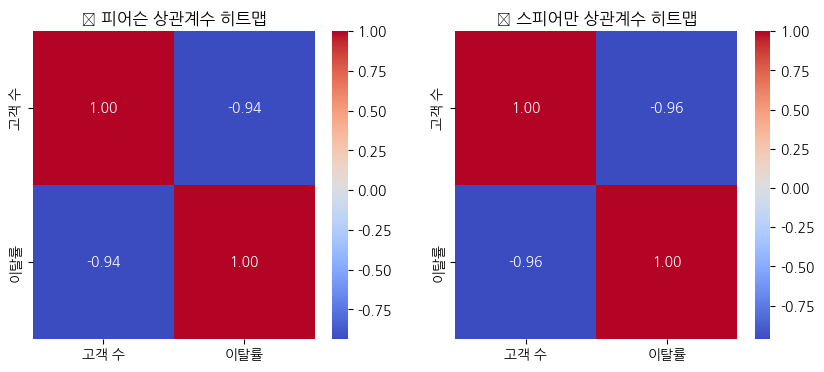

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 피어슨 상관계수 행렬 계산
pearson_matrix = df_corr.corr(method="pearson")

# 스피어만 상관계수 행렬 계산
spearman_matrix = df_corr.corr(method="spearman")

# 히트맵 그리기
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(pearson_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📊 피어슨 상관계수 히트맵")

plt.subplot(1, 2, 2)
sns.heatmap(spearman_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📊 스피어만 상관계수 히트맵")

plt.show()


In [10]:
import pandas as pd
# 고객이탈여부를 숫자로 변환
df["고객이탈여부(숫자)"] = df["고객이탈여부"].map({"No": 0, "Yes": 1})
# 나이대 변환 (10의 자리만 사용)
df["나이대"] = (df["연령"] // 10) * 10
# 각 나이대별 고객 수
customer_count = df.groupby("나이대")["고객ID"].count()
# 각 나이대별 이탈률 계산
churn_rate = df.groupby("나이대")["고객이탈여부(숫자)"].mean() * 100  # 백분율 변환
# 결과 합치기
result = pd.DataFrame({"고객 수": customer_count, "이탈률(%)": churn_rate})
# 결과 출력
print(result)

     고객 수     이탈률(%)
나이대                 
20   1344  19.940476
30   1258  22.893482
40   1308  21.865443
50   1217  22.514380
60    982  29.124236
70    691  39.652677
80     63  41.269841


In [11]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
# 이탈 여부를 숫자로 변환 (Yes = 1, No = 0)
df["이탈여부(숫자)"] = df["고객이탈여부"].map({"Yes": 1, "No": 0})
# 피어슨 & 스피어만 상관계수 계산
pearson_corr, pearson_p = pearsonr(df["나이대"], df["이탈여부(숫자)"])
spearman_corr, spearman_p = spearmanr(df["나이대"], df["이탈여부(숫자)"])
print(f":막대_차트: 피어슨 상관계수: {pearson_corr:.4f} (p-value: {pearson_p:.4f})")
print(f":막대_차트: 스피어만 상관계수: {spearman_corr:.4f} (p-value: {spearman_p:.4f})")

:막대_차트: 피어슨 상관계수: 0.1148 (p-value: 0.0000)
:막대_차트: 스피어만 상관계수: 0.1090 (p-value: 0.0000)
